# The trials of interpreting clinical trials - A Bayesian perspective

Jay Brophy [](https://orcid.org/0000-0001-8049-6875) (McGill University)  
December 24, 2024

In [ ]:
# Set global options for chunk outputs
knitr::opts_chunk$set(
  message = FALSE,  # Hide messages
  warning = FALSE,  # Hide warnings
  echo = TRUE,      # Show code
  eval = TRUE,      # Ensure code is evaluated
  comment = NA,     # Suppress "In [1]:" or similar prompts
  results = "markup" # Ensure output is rendered as markup, not interactive ?"asis"
)

suppressPackageStartupMessages({
  library(tidyverse)
  library(posterior)
  library(brms)
  library(Rcpp)
  library(lme4)
})


## Abstract

Background: Evidence based medicine (EBM) paradigm places systematic reviews and meta-analyses, ideally of randomized clinical trials (RCTs), at the top of the evidential pyramid. However, resolving situations with “conflicting” or “missing” evidence can be problematic.   <br> Methods: This is a case-based review of Bayesian techniques to assist in optimizing the interpretation of well performed RCTs with conflicting evidence. Using the example of cochicine in post acute myocardial infarction subjects, it is demonstrated how these techniques avoid common interpretative cognitive biases, provide additional analytical nuances, and thereby enhancing the original published conclusions.  <br> Results: A previous RCT (n=4745) had claimed a reduction in cardiovascular (CV) with colchicine (p=0.02). A more recent and larger RCT (n=7062) concluded that colchicine “did not reduce the incidence of CV events (p=0.93)”. This Bayesian analysis suggests that the effect of colchicine is indeterminate with a probability of a clinically meaningful benefit, defined as a 10% reduction in the relative risk, that vaires between 13% and 41% depending on whether the earlier study is ignored or considered. <br> Conclusions: If the trials are of equal high quality, conflicts are often illusory arising from the improper comparisons of statistical significance. Current statistical approaches which ignore prior evidence and rely on null hypothesis significance testing lead to vacillating beliefs that do not always faithfully respect the laws of probability and consequently may not align with the true state of knowledge. Bayesian techniques can address these issues and raisr the quality of clinical trial interpretations.

## Introduction

Evidence based medicine (EBM) paradigm places systematic reviews and meta-analyses, ideally of randomized clinical trials, at the top of the evidential pyramid. A less studied, but recurring question is how to approach decision making with “conflicting” or “missing” evidence. While this commentary will explore various statistical answers, it must be appreciated that these are only ancillary methods to the crucial element of clinical judgement. In an analogous manner to statistical significance not equating to causality, clinical judgement must precede statistical analyses in deciding what is in fact “combinable”.

## A recent example

In the CLEAR OASIS 9 trial([1](#ref-CLEAR)), acute myocardial infarction (AMI) patients were randomized to colchicine (n = 3,528) or placebo (n = 3,534) immediately after percutaneous coronary intervention (PCI). The primary outcome was major adverse cardiovascular events (MACE), a composite of cardiovascular (CV) death, MI, stroke, or ischemia-driven revascularization. With a median 3 year follow-up, there were 9.1% events in the colchicine group and 9.3% in the placebo arm, hazard ratio (HR) 0.99 (95% confidence interval \[CI\] 0.85-1.16, p = 0.93). Given the high quality of the study design and its execution as well as the large number of primary-outcome events (649), the authors reasoned that the chance of a spurious result was low. Thus, they concluded “… treatment with colchicine, when started soon after myocardial infarction and continued for a median of 3 years, did not reduce the incidence of the composite primary outcome.”  
<br> CLEAR authors acknowledge that the most comparable previous study was COLCOT([2](#ref-RN33)), a randomized trial of 4745 patients who received the same 0.5 mg daily colchicine dose (n=2366) or placebo within 30 days of an AMI and were followed for a median of 22.6 months. Their primary outcome was a composite (cardiovascular deaths, recurrent myocardial infarction, resuscitation after cardiac arrest, stroke, or urgent hospitalization for angina that led to revascularization), very similar to the CLEAR outcome. This trial had a total of 301 primary-outcome events, and colchicine treatment was associated with a 23% relative reduction (hazard ratio, 0.77; 95% \[CI\], 0.61 to 0.96; P = 0.02). In the CLEAR discussion([1](#ref-CLEAR)), there was no attempt to explain these “differences” other than observing that two other recent colchicine trials in stroke patients\[([3](#ref-RN52))\]([4](#ref-RN53)) also showed no benefit with colchicine and that CLEAR was a bigger trial, presumably with an improved precision of the treatment effect.  
<br> What now should the average clinician now believe? Should they adopt the implicit CLEAR investigators’ view that since that trial is larger it should be believed and that the evidence from the 4745 COLCOT patients should simply be forgotten or ignored. The CLEAR PI was more explicit in an interview following the oral presentation of their findings stating that before CLEAR “I was a believer in colchicine,” (implictly because of COLCOT(?), although this belief presumably wasn’t universally shared or the necessary equipoise would not have been present to proceed with the CLEAR trial) but after CLEAR “I decided to stop it in my parent”([5](#ref-RN7043)). This dichotomization of beliefs is common among clinicians, undoubtedly influenced by the null hypothesis significance testing paradigm and the conventional p value 0.05 threshold used in medical research. This approach encourages deterministic binary viewpoints not only for accepting or rejecting null hypotheses but also for clinical decision making.  
<br> On the other hand, some may may prefer to wait for a meta-analysis incorporating all available colchicine studies before formulating their opinion. Of course, meta-analyses are rarely performed when the number of trials is small and care must always be exercised to assure the consistency of study design, patient populations, and outcomes of any included studies. But what if there are no meta-analyses or even more disconcerting, no comparable previous trials at all? Is there another approach that facilitates a more nuanced interpretation of randomized trials like CLEAR either with, or without, the existence of prior knowledge?  
<br>

## The Bayesian approach

As mentioned above, the common statistical paradigm in medical research is null hypothesis significance testing (NHST) where decisions are conditioned on the comparison of p values (P (observed or more extreme data \| a statistical model and null hypothesis)[1] to prespecified type I errors. Unfortunately this approach may result in cognitive errors\[([6](#ref-RN3836))\]([7](#ref-RN3826))([8](#ref-RN5420)). On the other hand, a Bayesian approach provides the information clinicians are actually seeking, namely the probability that the hypothesis is true given the observed data, P (hypothesis \| observed data). This posterior distribution, derived from a weighted combination of a prior belief and the current data, not only allows the incorporation of prior knowledge according to the rules of probability, when available, but also avoids the aforementioned cognitive errors.

### Vague priors

Bayesian analyses can use differing prior beliefs thereby providing an assessment of the overall robustness of the posterior conclusions. Adopting the CLEAR viewpoint of trial interpretation independently of any prior knowledge, a vague prior would be chosen for the Bayesian analysis so that the posterior probability distribution is completely dominated by the observed CLEAR data. An advantage of probability distributions is they are not restricted to specific point estimates but permit calculations for multiple different cutpoints or intervals. For example, one might be particularly interested in probabilities exceeding a clinically meaningful thresholds for benefit or harm. Such clinical cutpoints can be individually selected but for demonstration purposes, a benefit threshold of RR \< 0.9 and harm threshold of RR \> 1.1 as been chosen.

[1] Shorthand for “Probability (observed or more extreme data given a statistical model and null hypothesis)”

Running MCMC with 4 parallel chains...

Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.2 seconds.

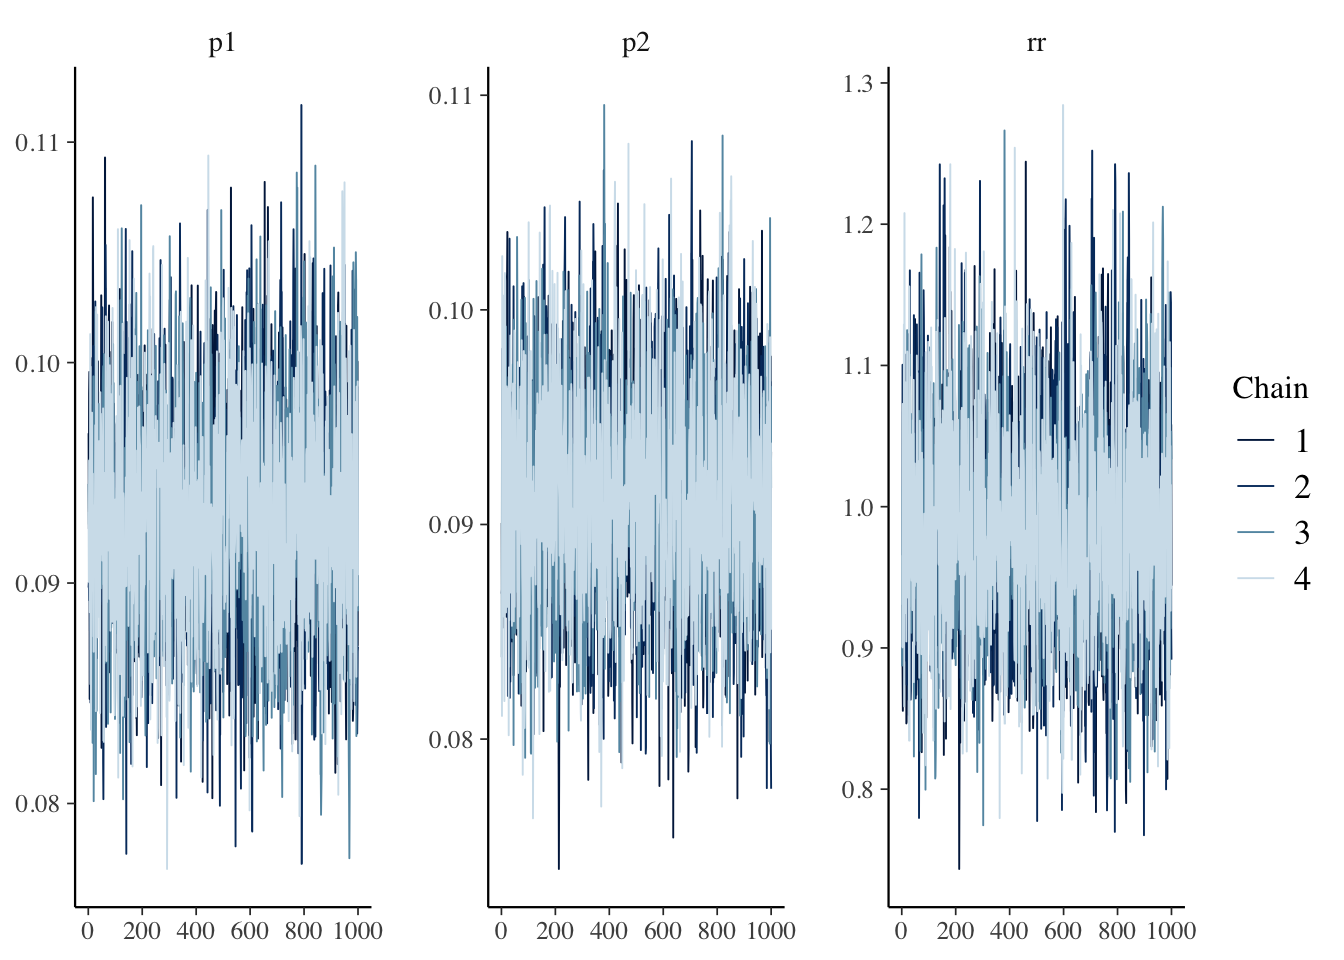

# A tibble: 6 × 10
  variable       mean    median      sd     mad       q5      q95  rhat ess_bulk
  <chr>         <dbl>     <dbl>   <dbl>   <dbl>    <dbl>    <dbl> <dbl>    <dbl>
1 lp__     -2173.      -2.17e+3 1.02e+0 7.56e-1 -2.18e+3 -2.17e+3  1.00    1955.
2 p1           0.0929   9.28e-2 4.98e-3 4.95e-3  8.48e-2  1.01e-1  1.00    2809.
3 p2           0.0912   9.12e-2 4.96e-3 5.09e-3  8.33e-2  9.96e-2  1.00    2505.
4 y1_pred    329.       3.28e+2 2.43e+1 2.37e+1  2.9 e+2  3.7 e+2  1.00    2946.
5 y2_pred    322.       3.22e+2 2.45e+1 2.37e+1  2.82e+2  3.63e+2  1.00    3279.
6 rr           0.985    9.81e-1 7.56e-2 7.43e-2  8.65e-1  1.12e+0  1.00    2767.
# ℹ 1 more variable: ess_tail <dbl>

In [ ]:

# Data for the model
data_list <- list(
  n2 = 3528,
  y2 = as.integer(3528 * 0.091),
  n1 = 3534,
  y1 = as.integer(3534 * 0.093)
)

# Compile and fit the model
mod <- cmdstan_model("binom_2.stan")
fit <- mod$sample(data = data_list, chains = 4, parallel_chains = 4,        refresh = 0, seed = 123)


For CLEAR data with vague priors, the probabilities of clinical benefit (RR \< 0.9), practical equivalence ( 0.9 \< RR \< 1.1) and harm (RR \> 1.1) are 12.625%, 80.3% and 7.075%, respectively. The probability of any benefit (RR \< 1) is 59.8%. These results are shown graphically in Figure 1, where the area under the curve is proportional to each probability. This analysis thus shows a small, but not trivial residual probability (12.625%) for a clinically significant benefit (as arbitrarily defined by a minimum 10% decrease in RR).

In [ ]:
# Assuming rr_vector is already defined
d <- density(rr_vector)
density_df <- data.frame(x = d$x, y = d$y)

# Assign categories based on the x values
density_df$category <- ifelse(density_df$x < 0.9, "benefit",
                              ifelse(density_df$x <= 1.1, "equivalence", "harm"))

p <- ggplot(density_df, aes(x = x, y = y)) +
  geom_area(data = subset(density_df, category == "benefit"), fill = "green", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "equivalence"), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "harm"), fill = "red", alpha = 0.5) +
  geom_vline(xintercept = 0.9, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.1, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.0, color = "blue", linewidth=1.5) +
  labs(title="Figure 1 Probability Density Plot for CLEAR ",
       subtitle = "with a vague prior") +
  theme_classic() +
  scale_x_continuous(expand = c(0, 0)) +  # No expansion on x-axis
  scale_y_continuous(expand = c(0, 0)) +  # No expansion on y-axis
  xlab("Relative Risk") +
  ylab("Density")

p <- p + 
  annotate("text", x = 0.80, y = max(density_df$y, na.rm = TRUE) * 0.6, label = "Green", color = "green", size = 5, fontface = "bold") +
  annotate("text", x = 0.87, y = max(density_df$y, na.rm = TRUE) * 0.55, label = " = region of clinical benefit", color = "black", size = 5) +
  annotate("text", x = 0.8, y = max(density_df$y, na.rm = TRUE) * 0.8, label = "Yellow", color = "yellow", size = 5, fontface = "bold") +
  annotate("text", x = .87, y = max(density_df$y, na.rm = TRUE) * 0.75, label = " = region of practical equivalence", color = "black", size = 5) +
  annotate("text", x = 1.1, y = max(density_df$y, na.rm = TRUE) * 0.4, label = "Red", color = "red", size = 5, fontface = "bold") +
  annotate("text", x = 1.17, y = max(density_df$y, na.rm = TRUE) * 0.35, label = " = region of clinical harm", color = "black", size = 5) 

ggsave("output/clear_vague.png", width = 8, dpi = 600)


Saving 8 x 5 in image

<br> Some clinicians might interpret these results not as a rejection of the colchicine hypothesis as proposed by the CLEAR investigators but rather alternatively as showing that while somewhat unlikely the possibility of a colchicine clinical benefit has not been definitively excluded and that additional studies are required to refine the estimate. However if a clinician was a priori a colchicine “believer” this vague prior of this analysis should be replaced by the appropriate informative prior. Informative priors, like vague priors, are be combined with the current data according to Bayes Theorem and follow the laws of probability, i.e. a weighted average with weights proportional to the precision of the prior and current data.  

### Informative priors

Given that CLEAR([1](#ref-CLEAR)) and COLCOT([2](#ref-RN33)) were both well designed, well executed trials examining the same intervention in the same study populations and published in the same esteemed medical journal, its seems absurd to ignore either of them. A fundamental question is are these two study results really different? From a statistical perspective the trials aren’t radically different with overlapping 95% CIs. It is only if each trial is assessed with the dichotomous statistical significance lens that the two trials appear different. There are no substantive reason explaining this ersatz statistical heterogeneity given the same interventions in similar populations with the same measured outcome. The key insight being “In making a comparison between two treatments, one should look at the statistical significance of the difference rather than the difference between their significance levels([9](#ref-RN5721)). The Bayesian statistical lens will sharpen this perspective.

In [ ]:
# Data for the COLCOT model
data_list1 <- list(
  n2 = 2366,
  y2 = as.integer(2366 * 0.055),
  n1 = 2379,
  y1 = as.integer(2379 * 0.071)
)

# Compile and fit the model
mod1 <- cmdstanr::cmdstan_model("binom_2.stan")
fit1 <- mod1$sample(data = data_list1, chains = 4, parallel_chains = 4,        
                   refresh = 0, seed = 123)

# Extracting posterior samples
posterior_samples1 <- fit1$draws()

# Plotting
color_scheme_set("blue")
# mcmc_trace(posterior_samples, pars = c("p1", "p2", "rr"), nrow = 3)

# Plot relative risk distributions with no formatting
# mcmc_areas(posterior_samples, pars = "rr", prob = 0.95)

# print summary
fit1$summary()

# Correct extraction of relative risk samples
rr_samples1 <- fit1$draws(variables = "rr")
rr_vector1 <- as.vector(rr_samples1)  # Convert to a simple vector for easier handling

options(digits=2)
# Calculating probabilities
prob_rr_less_09 <- mean(rr_vector1 < 0.9)
prob_rr_between_09_11 <- mean(rr_vector1 >= 0.9 & rr_vector1 <= 1.1)
prob_rr_greater_11 <- mean(rr_vector1 > 1.1)
prob_rr_less_08 <- mean(rr_vector1 < 0.8)
prob_rr_less_10 <- mean(rr_vector1 < 1.0)


# Print the probabilities
# cat("Probability RR < 1.0 (P (statistical signifiance)): ", prob_rr_less_10, 
#   "\nProbability RR < 0.8: ", prob_rr_less_08, 
#   "\nProbability RR < 0.9: ", prob_rr_less_09,
#   "\nProbability RR 0.9 to 1.1: ", prob_rr_between_09_11, 
#   "\nProbability RR > 1.1: ", prob_rr_greater_11, "\n")


<br> First, COLCOT results can be analyzed within a Bayesian framework, again with a vague prior so results are dependent uniquely on the COLCOT data. The probabilities of clinical benefit (RR \< 0.9), practical equivalence ( 0.9 \< RR \< 1.1) and harm (RR \> 1.1) are 89.7%, 10.225% and 0.075%, respectively. The probability of a clinical benefit exceeding a 20% reduction is 58.55% and the probability of any benefit, 99.075% (see Figure 2).

In [ ]:
# Assuming rr_vector is already defined
d <- density(rr_vector1)
density_df <- data.frame(x = d$x, y = d$y)

# Assign categories based on the x values
density_df$category <- ifelse(density_df$x < 0.9, "benefit",
                              ifelse(density_df$x <= 1.1, "equivalence", "harm"))

p1 <- ggplot(density_df, aes(x = x, y = y)) +
  geom_area(data = subset(density_df, category == "benefit"), fill = "green", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "equivalence"), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "harm"), fill = "red", alpha = 0.5) +
  geom_vline(xintercept = 0.9, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.1, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.0, color = "blue", linewidth=1.5) +
  labs(title="Figure 2 Probability Density Plot for COLCOT",
       subtitle = "with a vague (Beta(1,1) prior") +
  theme_classic() +
  scale_x_continuous(expand = c(0, 0)) +  # No expansion on x-axis
  scale_y_continuous(expand = c(0, 0)) +  # No expansion on y-axis
  xlab("Relative Risk") +
  ylab("Density")

p1 <- p1 + 
  annotate("text", x = 0.64, y = max(density_df$y, na.rm = TRUE) * 0.8, label = "Green", color = "green", size = 5, fontface = "bold") +
  annotate("text", x = 0.79, y = max(density_df$y, na.rm = TRUE) * 0.73, label = " = region of clinical benefit", color = "black", size = 5) +
  annotate("text", x = 0.9, y = max(density_df$y, na.rm = TRUE) * 0.6, label = "Yellow", color = "yellow", size = 5, fontface = "bold") +
  annotate("text", x = 1.05, y = max(density_df$y, na.rm = TRUE) * 0.53, label = " = region of practical equivalence", color = "black", size = 5) +
  annotate("text", x = 1.15, y = max(density_df$y, na.rm = TRUE) * 0.4, label = "Red", color = "red", size = 5, fontface = "bold") +
  annotate("text", x = 1.10, y = max(density_df$y, na.rm = TRUE) * 0.35, label = " = region of clinical harm", color = "black", size = 5)

ggsave("output/colcot_vague.png", width = 8, dpi = 600)


Saving 8 x 5 in image

This figure explains why before CLEAR, some clinicians were “colchicine believers” and other were not. Some will be enthusiastic about a 89.7% probability of a clinical benefit (assuming a 10% reduction in RR is an appropriate clinical threshold). Those willing to accept this benefit threshold might classify themselves initially as “colchicine believers”. Others may be more conservative and want a larger reduction in RR, given the inconvenience, cost, and possible side effects of adding another medication. The probability of an at least 20% reduction in RR was only 58.55%, not much better than a coin toss, underscoring a willingness to wait for, and even participate in, further studies (CLEAR) to better define clinical benefits.  
<br>

Running MCMC with 4 parallel chains...

Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.2 seconds.

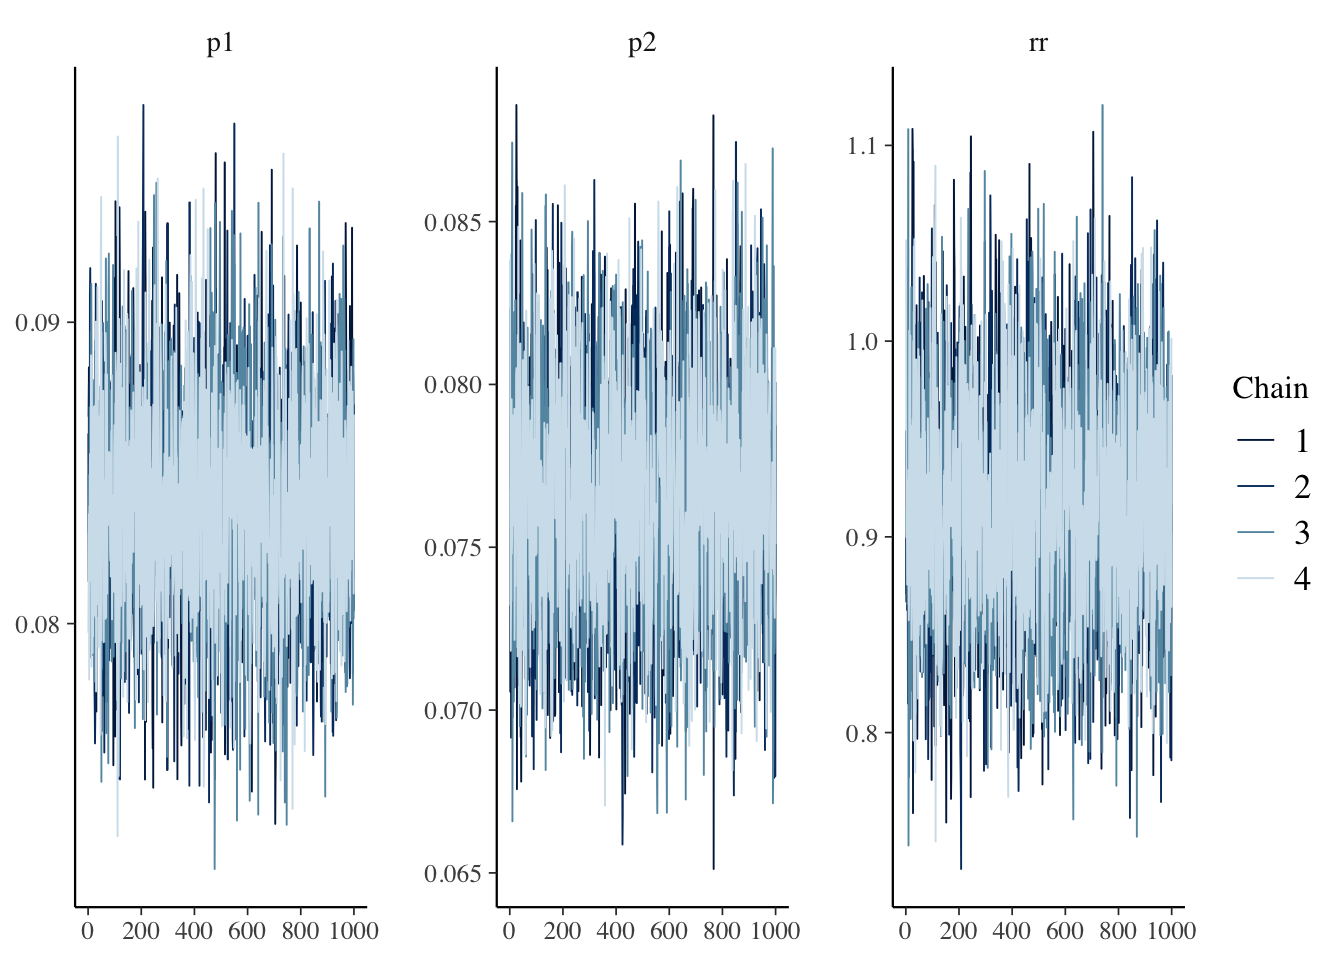

# A tibble: 4 × 10
  variable       mean    median      sd     mad       q5      q95  rhat ess_bulk
  <chr>         <dbl>     <dbl>   <dbl>   <dbl>    <dbl>    <dbl> <dbl>    <dbl>
1 lp__     -3297.      -3.30e+3 0.980   0.667   -3.30e+3 -3.30e+3  1.00    1915.
2 p1           0.0839   8.38e-2 0.00355 0.00348  7.81e-2  8.97e-2  1.00    3516.
3 p2           0.0765   7.65e-2 0.00343 0.00349  7.09e-2  8.23e-2  1.00    3237.
4 rr           0.914    9.13e-1 0.0567  0.0576   8.23e-1  1.01e+0  1.00    3281.
# ℹ 1 more variable: ess_tail <dbl>

In [ ]:
# prior from COLCOT

alpha1 = as.integer(2379 * 0.071)
beta1 <- 2379 - alpha1
alpha2 = as.integer(2366 * 0.055)
beta2 <- 2366 - alpha2

# Data for the model
data_list <- list(
  n1 = 3534,
  y1 = as.integer(3534 * 0.093),
  n2 = 3528,
  y2 = as.integer(3528 * 0.091),
  alpha1 = alpha1,
  beta1 = beta1,
  alpha2 = alpha2,
  beta2 = beta2
)


# Compile and fit the model
mod <- cmdstan_model("binom_2_priorCOLCOT.stan")
fit <- mod$sample(data = data_list, chains = 4, parallel_chains = 4,        
                  refresh = 0, seed = 123)


In [ ]:
# Assuming rr_vector is already defined
d <- density(rr_vector)
density_df <- data.frame(x = d$x, y = d$y)

# Assign categories based on the x values
density_df$category <- ifelse(density_df$x < 0.9, "benefit",
                              ifelse(density_df$x <= 1.1, "equivalence", "harm"))

p2 <- ggplot(density_df, aes(x = x, y = y)) +
  geom_area(data = subset(density_df, category == "benefit"), fill = "green", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "equivalence"), fill = "yellow", alpha = 0.5) +
  geom_area(data = subset(density_df, category == "harm"), fill = "red", alpha = 0.5) +
  geom_vline(xintercept = 0.9, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.1, linetype = "dashed", color = "black") +
  geom_vline(xintercept = 1.0, color = "blue", linewidth=1.5) +
  labs(title="Figure 3 Probability Density Plot for CLEAR",
       subtitle = "with an informative (COLCOT) prior") +
  theme_classic() +
  scale_x_continuous(expand = c(0, 0)) +  # No expansion on x-axis
  scale_y_continuous(expand = c(0, 0)) +  # No expansion on y-axis
  xlab("Relative Risk") +
  ylab("Density")

p2 <- p2 + 
  annotate("text", x = 0.80, y = max(density_df$y, na.rm = TRUE) * 0.6, label = "Green", color = "green", size = 5, fontface = "bold") +
  annotate("text", x = 0.86, y = max(density_df$y, na.rm = TRUE) * 0.56, label = " = region of clinical benefit", color = "black", size = 5) +
  annotate("text", x = 0.8, y = max(density_df$y, na.rm = TRUE) * 0.8, label = "Yellow", color = "yellow", size = 5, fontface = "bold") +
  annotate("text", x = .90, y = max(density_df$y, na.rm = TRUE) * 0.76, label = " = region of practical equivalence", color = "black", size = 5) +
  annotate("text", x = 1.00, y = max(density_df$y, na.rm = TRUE) * 0.4, label = "Red", color = "red", size = 5, fontface = "bold") +
  annotate("text", x = 1.07, y = max(density_df$y, na.rm = TRUE) * 0.33, label = " = region of clinical harm", color = "black", size = 5)

ggsave("output/clear_colcot.png", width=8, dpi = 600)


Saving 8 x 5 in image

Accepting the validity of both trials, what should one now believe after CLEAR, if the prior belief is well represented by COLCOT data. The only change to the previous Bayesian analysis is to replace the vague prior with this informative prior. The results are displayed graphically in Figure 3 where the posterior distribution is now a weighted average between the COLCOT probability distribution (prior) and the CLEAR likelihood distribution.   
<br> Consider the colchicine “believer” prior to CLEAR but not afterwards. If COLCOT was responsible for the initial positive prior belief, this analyse suggests after CLEAR there remains a 40.9% probability of a clinically meaningful decrease in CV risk with colchicine, a 58.975% probability of clinical equivalence with placebo and virtually no chance of a clinically meaningful increase in harm. Of course, if a clinician had an clinical cutpoint for efficacy of RR \< 0.80 then it does indeed seem reasonable, based on the totality of the evidence to be a “non-believer” after CLEAR as the probability of a decrease in cardiovascular outcomes of this magnitude is less than 1.775%. However consistency would imply that their prior belief should also be referenced to a probability of RR \< 0.80 which for COLCOT was only 60%. This seems a fairly modest probability to have been a “believer” in this therapy before the current study.  
<br> This example demonstrates that an intuitive reconciliation of prior and posterior beliefs can be difficult and is not facilitated by dichotomized reasoning. Moreover, clinicians may exhibit an availability bias whereby they are overly influenced by the last trial, particularly if they were intimately involved in it. The probabilistically correct harmonization of all available evidence with a Bayesian analysis can mininmize these cognitive errors.  

### Bayesian Meta-analysis

Updating prior beliefs is temporally consistent with data availability and mirrors human sequential learning. Similar results are nevertheless reached with Bayesian random effects (hierarchical) meta-analysis when data temporality is not considered. Individual studies are then treated as part of a larger population of studies and allows for “shrinkage”, where individual study estimates are partially “pulled” toward the overall mean effect. Hierarchical models represent a compromise between complete pooling (fixed effect) or no pooling (study independency).  <br> Hierarchical models accounts for both within and between study variability producing pooled mean estimates that integrate information from different studies while acknowledging that individual study effects might vary. These models also can provide the predictive interval for the next study from the super population of possible studies. Again in the Bayesian paradigm, all parameters require an initial priors and a meta-analysis of the colchicine studies using vague priors is displayed in Figure 4.

In [ ]:
# hierarchical meta-analytical data prep and plot using brms package
# slightly more informative priors N(0,1) than the default priors
library(tidybayes); library(brms); library(posterior); library(tidyverse)

# data prep
total <- matrix(c(322, (3528-322), 327, (3534-327)), nrow = 2, byrow = TRUE, dimnames = list(c("colchicine", "placebo"), c("Event", "No event")))
epiR::epi.2by2(dat = as.table(total), method = "cohort.count", conf.level = 0.95, units = 100, outcome = "as.columns")

col_df <- data.frame(study=c("CLEAR", "COLCOT"), n_col=c(3528,2366), e_col=c(322,130), n_ctl=c(3534,2379), e_ctl=c(327,169))
dat <- metafor::escalc(measure="RR", ai=e_col, n1i = n_col, ci=e_ctl,  n2i =n_ctl, data=col_df)

# standard (non-bayesian) random effects model
library(metafor)
me.fe <- rma(dat$yi, sei=sqrt(dat$vi), method = "FE") # exponentiation c(exp(me.fe$b), exp(me.fe$ci.lb), exp(me.fe$ci.ub))
me.re <- rma(dat$yi, sei=sqrt(dat$vi), method = "REML") # exponentiation c(exp(me.re$b), exp(me.re$ci.lb), exp(me.re$ci.ub))
plot_Plato <- meta::metabin(col_df$e_col, col_df$n_col, col_df$e_ctl, col_df$n_ctl, sm="RR", method ="I", studlab=dat$Region, prediction=TRUE, comb.random =TRUE)
print(summary(plot_Plato,prediction=TRUE), digits=2)

meta::forest(plot_Plato, studlab = col_df$study)

# Time to go bayesian
# Specify priors for mu and tau (could also ignore and use brms defaults,  set_prior("normal(0,10)", class = "sd"))
prior <- c(
  set_prior("normal(0, 1)", class = "Intercept"),      # Matches Stan's prior for mu
  set_prior("normal(0, 1)", class = "sd")             # Matches Stan's prior for tau
)

# Fit the model with custom priors
brm_out <- brm(
  yi | se(sqrt(vi)) ~ 1 + (1|study), 
  data = dat, 
  iter = 20000, warmup = 2000, cores = 4, refresh = 0,
  control = list(adapt_delta = 0.99), # Improve convergence
  prior = prior,                     # Apply the custom priors
  seed = 123
)

summary(brm_out)


# Extract posterior samples as_draws() is another option
post <- brm_out %>%
  spread_draws(b_Intercept, r_study[study,]) %>%  # variables(brm_out)
  median_qi(condition_mean = b_Intercept + r_study, .width = c(.95)) %>% 
  rename(lower = .lower, rr = condition_mean, upper = .upper) %>% 
  select(study, rr, lower, upper) # Keep relevant columns for study-level output

post[,c(2:4)] <- apply(post[,c(2:4)],2,exp) # change from log(OR) to OR

# Extract posterior draws with posterior package and as_draws_df
draws <- as_draws_df(brm_out)  # variables(draws) to get names

# Mean and 95% CI for the mean effect
mean_intercept <- mean(draws$b_Intercept) # Mean effect (Intercept)
ci_intercept <- quantile(draws$b_Intercept, probs = c(0.025, 0.975)) # Between-study standard deviation
sigma <- draws$sigma                       # Residual standard deviation

# Transform to OR scale
mean_or <- exp(mean_intercept)
ci_or <- exp(ci_intercept)

# Simulate predicted values for the next study (log scale)
predicted_values <- rnorm(n = length(draws$b_Intercept), mean = mean_intercept,
                          sd = sqrt(draws$sd_study__Intercept^2 + sigma^2)
)
predicted_ci <- quantile(predicted_values, probs = c(0.025, 0.975))

# Transform predicted values to OR scale
predicted_mean_or <- exp(mean(predicted_values))
predicted_ci_or <- exp(predicted_ci)


#########

dat <- dat %>% 
  mutate(rr=yi, upper= yi +1.96*sqrt(vi), lower= yi - 1.96*sqrt(vi)) %>% 
  select(study,rr,lower,upper)
dat[,c(2:4)] <- apply(dat[,c(2:4)],2,exp)


post <- rbind(post, dat)

post$lab <- rep(c("Theta", "Y"), each = 2)
post$id <- c(1,2,1,2)

# Create the data frame with desired structure for hierarchical plotting
# Add overall mean and next study
results_df <- tibble(
  study = c("Mean", "Predicted Next Study"),
  lower = c(ci_or[1], predicted_ci_or[1]),
  rr = c(mean_or, predicted_mean_or),
  upper = c(ci_or[2], predicted_ci_or[2])
)
results_df$lab <- c("Mean", "Next")
results_df$id <- c(3,4)

post <- rbind(post, results_df)

g1 <- ggplot(post, aes(x = forcats::fct_rev(study), y = rr, ymin = lower, ymax = upper, col = lab)) +  
  geom_pointrange(aes(col = lab), position = position_dodge(width = 0.50)) +
  coord_flip() + geom_hline(aes(yintercept = 0.895), lty = 2) +  xlab("") + 
  ylab("")  + theme(legend.position="bottom") + geom_hline(aes(yintercept = 1), lty = 1) +
  scale_colour_discrete(name="", 
                        labels = c("Theta" = bquote("Random effect \n(hierarchical \"shrinking\"):"~exp(theta[J])~" "),
                                   "Y"= bquote("Relative risk \n(observed data):"~exp(Y[J])))) +
  labs(title = "Figure 4 Bayesian hierarchical model of cholcicine trials",
       subtitle = "Observed and hierarchical individual trial results",
       caption = "Prior tau = normal(0, 1.0)
\nMean prior = normal(0, 1.0) ") +
  theme_bw()

ggsave("output/brms_hier.png", dpi = 600, width = 12, height = 6)

########## Reproduce same table as from Stan
# Summarize study-level estimates

# Extract and summarize overall mu
mu_values <- brm_out %>% spread_draws(b_Intercept) %>% pull(b_Intercept)
overall_mu <- tibble(study = "Overall (mu)", rr = mean(mu_values, na.rm = TRUE),
                     lower = quantile(mu_values, 0.025, na.rm = TRUE),
                     upper = quantile(mu_values, 0.975, na.rm = TRUE))

# Extract and summarize overall tau
tau_values <- brm_out %>% spread_draws(sd_study__Intercept) %>% pull(sd_study__Intercept)
overall_tau <- tibble(study = "Overall (tau)", rr = mean(tau_values, na.rm = TRUE),
                      lower = quantile(tau_values, 0.025, na.rm = TRUE),
                      upper = quantile(tau_values, 0.975, na.rm = TRUE))

# Combine all summaries
options(digits = 3)
temp <- post[c(1:2),c(1:4)]
temp[,c(2:4)] <- apply(temp[,c(2:4)],2,log) 
overall_post <- bind_rows(temp, overall_mu, overall_tau)
overall_post

# probability of > 10% reduction, log(.9) = -0.11
# mean sd = (.653 + .860)/3.92 = 0.386
# pnorm(-.11, -.111, .39) = 0.51 or more precisely
# pnorm(.9, 0.896, 0.382) = 0.504 from post (1.921-.423)/3.92 = 0.382


The figure demonstrates several key points;  
1. there is shrinkage of each observed trial result towards the global mean  
2. the global mean is a normal(0.896, 0.386) distribution and P(colchicine benefit \> 10% RR reduction) = 50%  
3. the probability result approaches that obtained from the previous sequential Bayesian approach

### Bayesian meta-analysis with a single trial

While hierarchical meta-analyses account for both within study and between study variability, a procedural question arises if there is only one study. In this case, a paradoxical situation arises due to between study variation being unmeasurable. Consequently the single study without this between study variation estimate appears to provide better precision in estimating the mean population effect than when more evidence is avaialble in the form of multiple studies with thier between study heterogeneity which is typically not equal to zero.  <br> Compared to naively ignoring this between study variation, a recent study of single studies ([10](#ref-RN7045)) showed an empirical Bayes approach using as a prior the distribution of treatment effects and heterogeneity from the 1,636 meta-analyses in the Cochrane Database of Systematic Reviews showed reductions in the mean squared error for estimating the study-level and population-level effects. For the CLEAR example, this novel approach gives a 58% probability of a positive effect and a 10% probability that the effect exceeds a 10% RR reduction, a consistent answer with the previous analysis with vague priors.

## Conclusion

Clinicians are often faced with “conflicting” trial evidence. However if the trials are of equal high quality, often these conflicts are illusory arising from the improper comparisons of statistical significance. Systematic reviews and meta-analyses of prior evidence are now de riguer before a study is considered for peer review funding. Yet there is no similar mandate for evidence synthesis upon trial completion. Indeed current incentives strongly favor each trial being individually interpreted. However, as demonstrated in the colchicine trials, this approach can lead to vacillating beliefs that do not respect the laws of probability and consequently may not align with the true state of knowledge. Bayesian techniques can address these issues thereby raising the quality of clinical trial interpretations. 

\## Figures

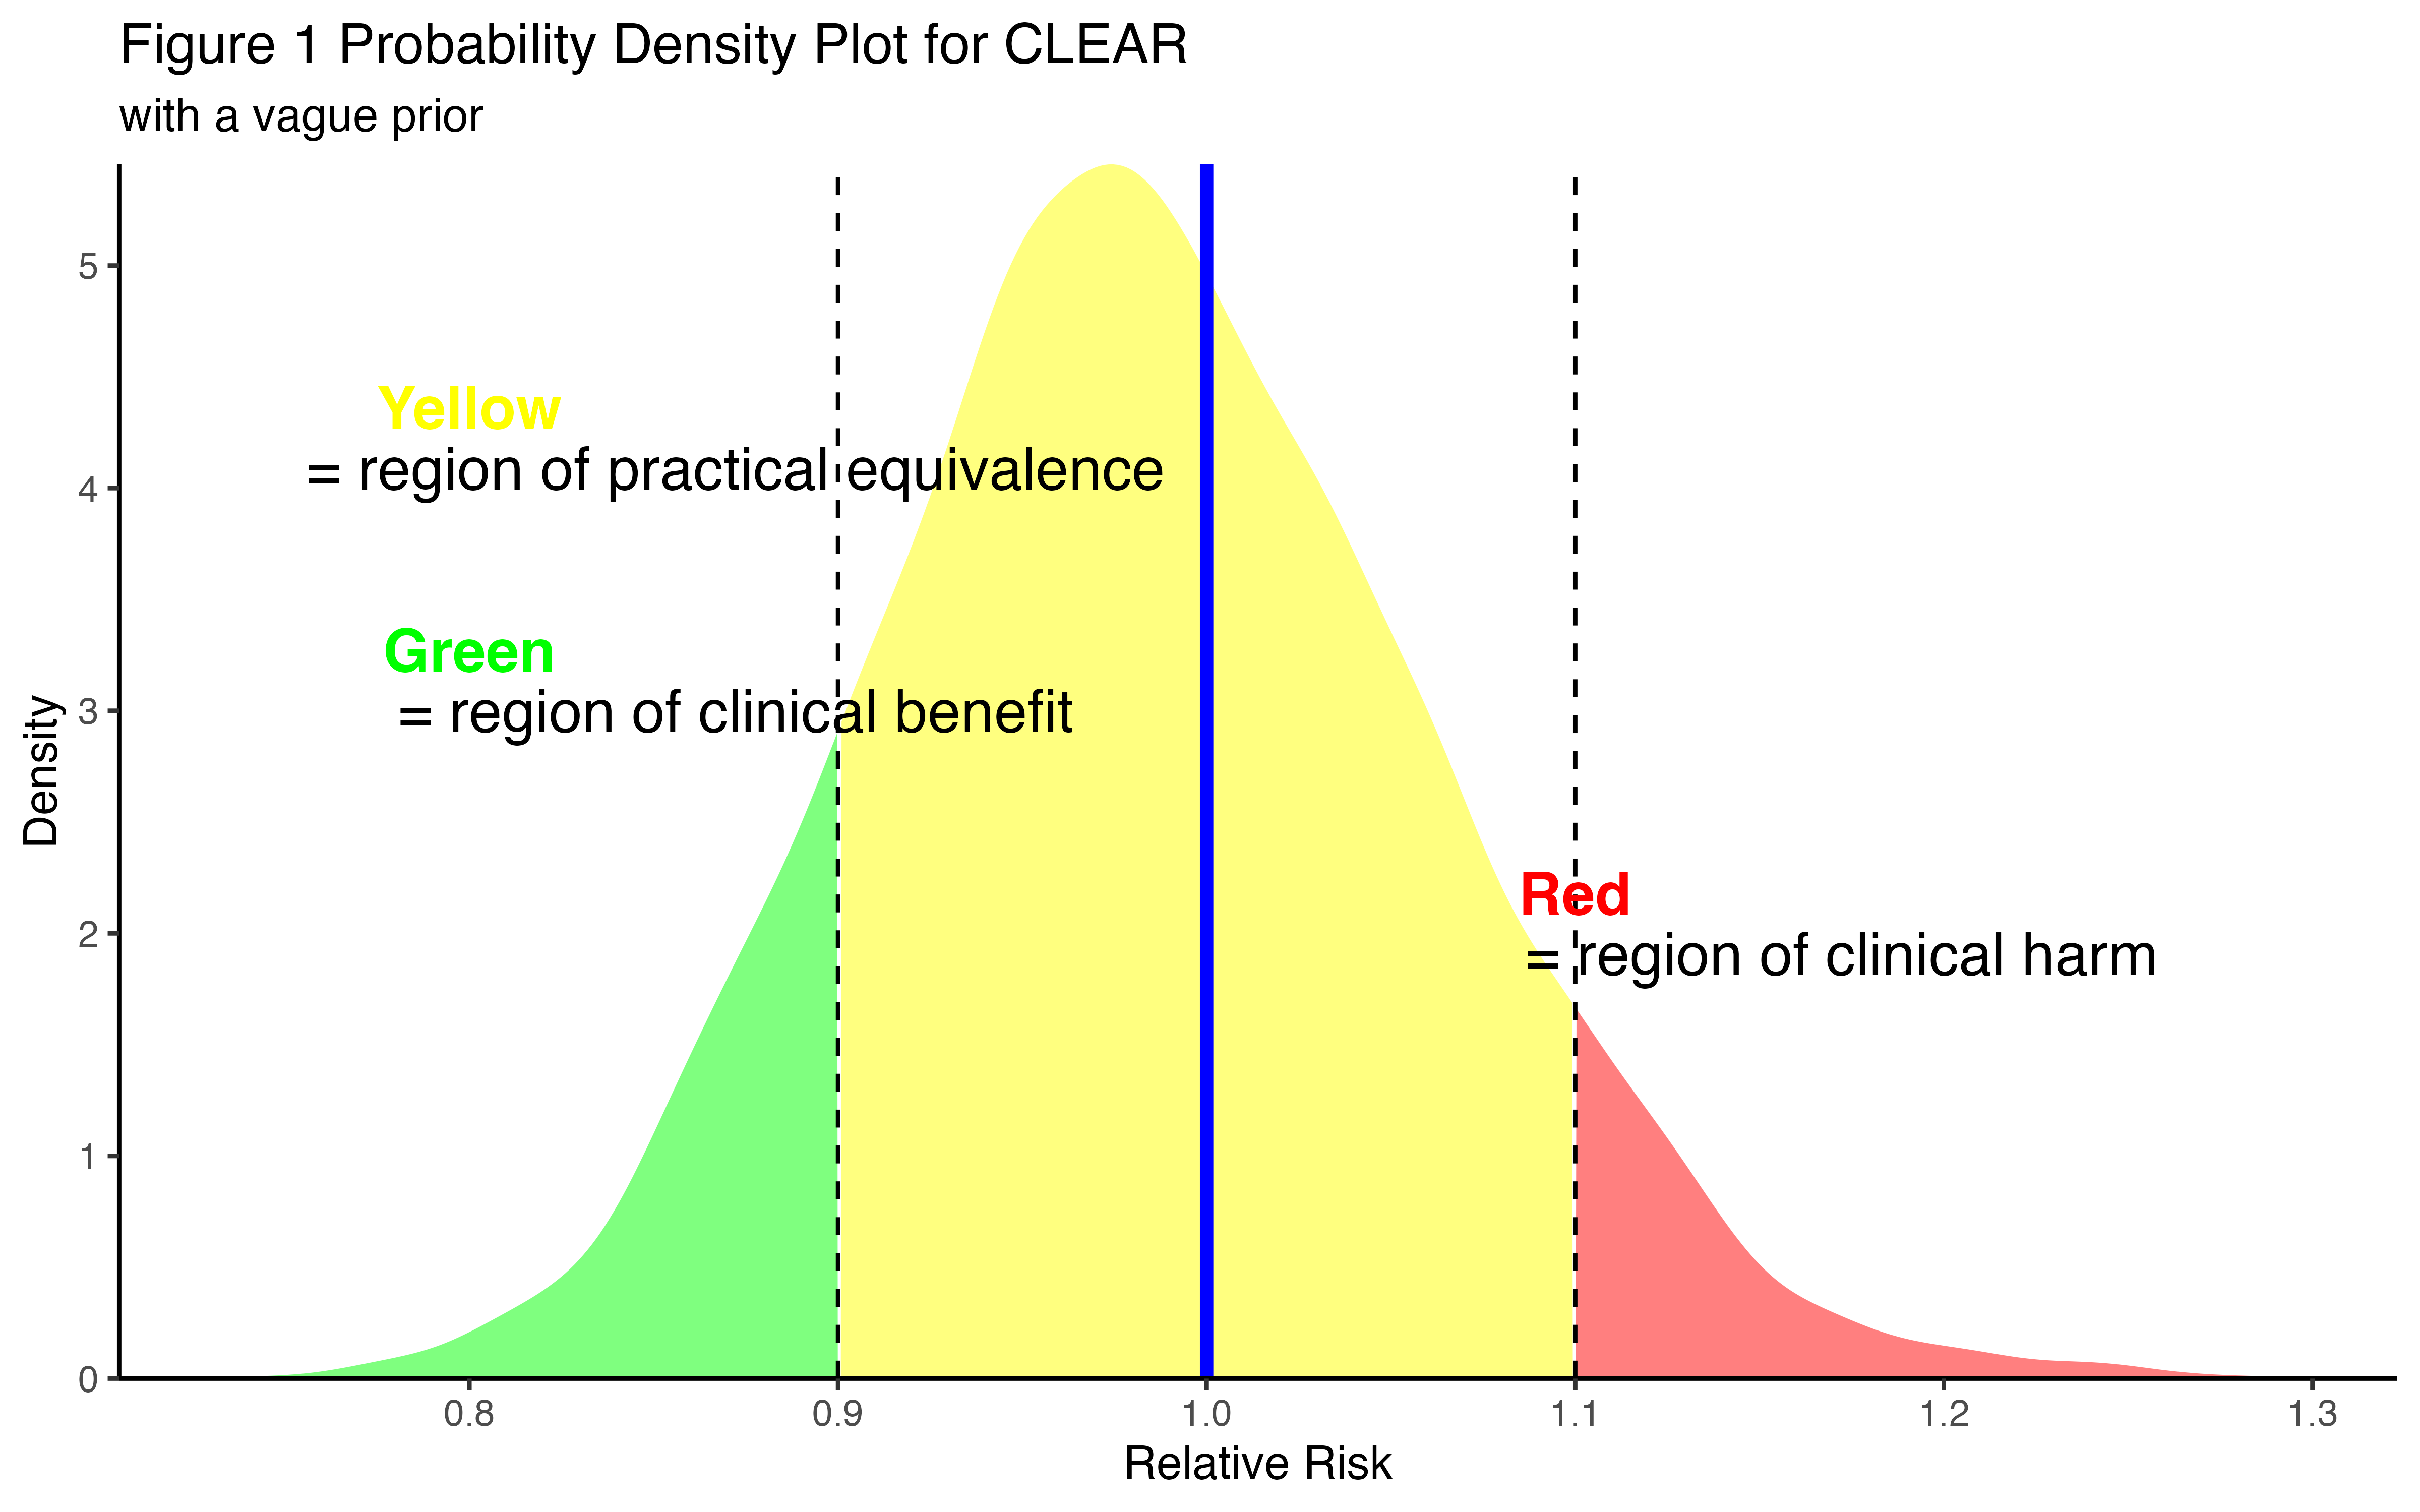   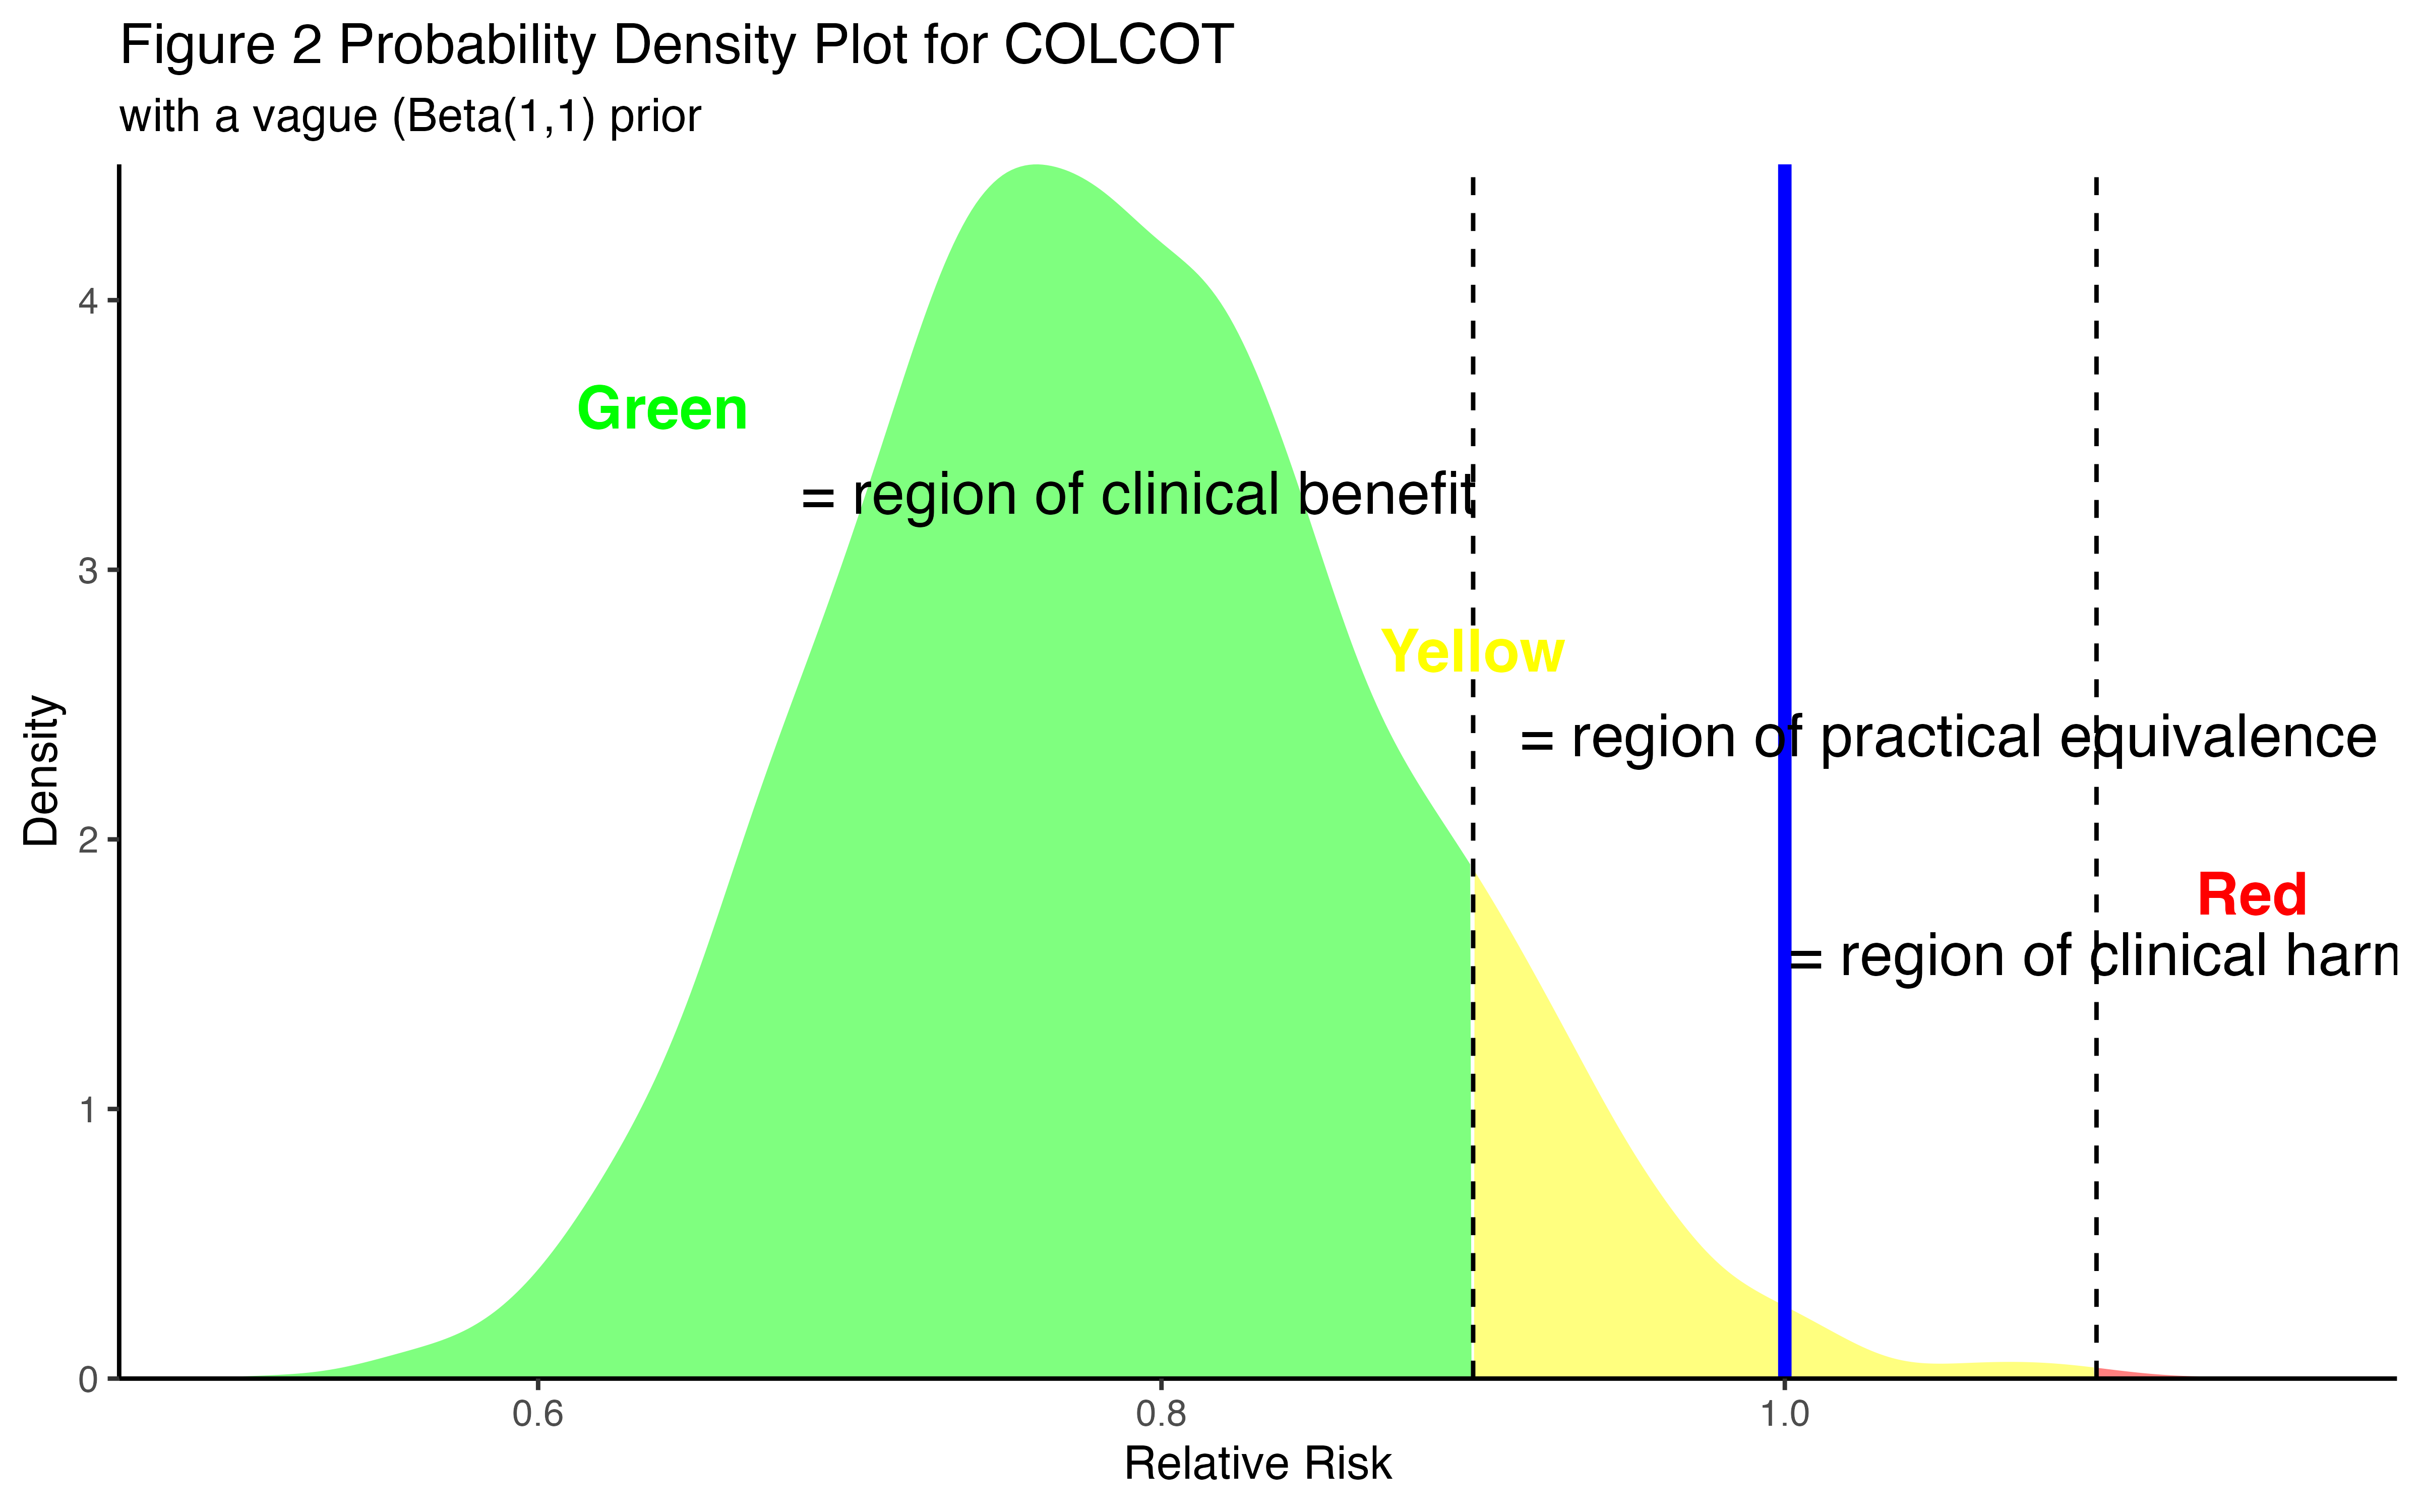  
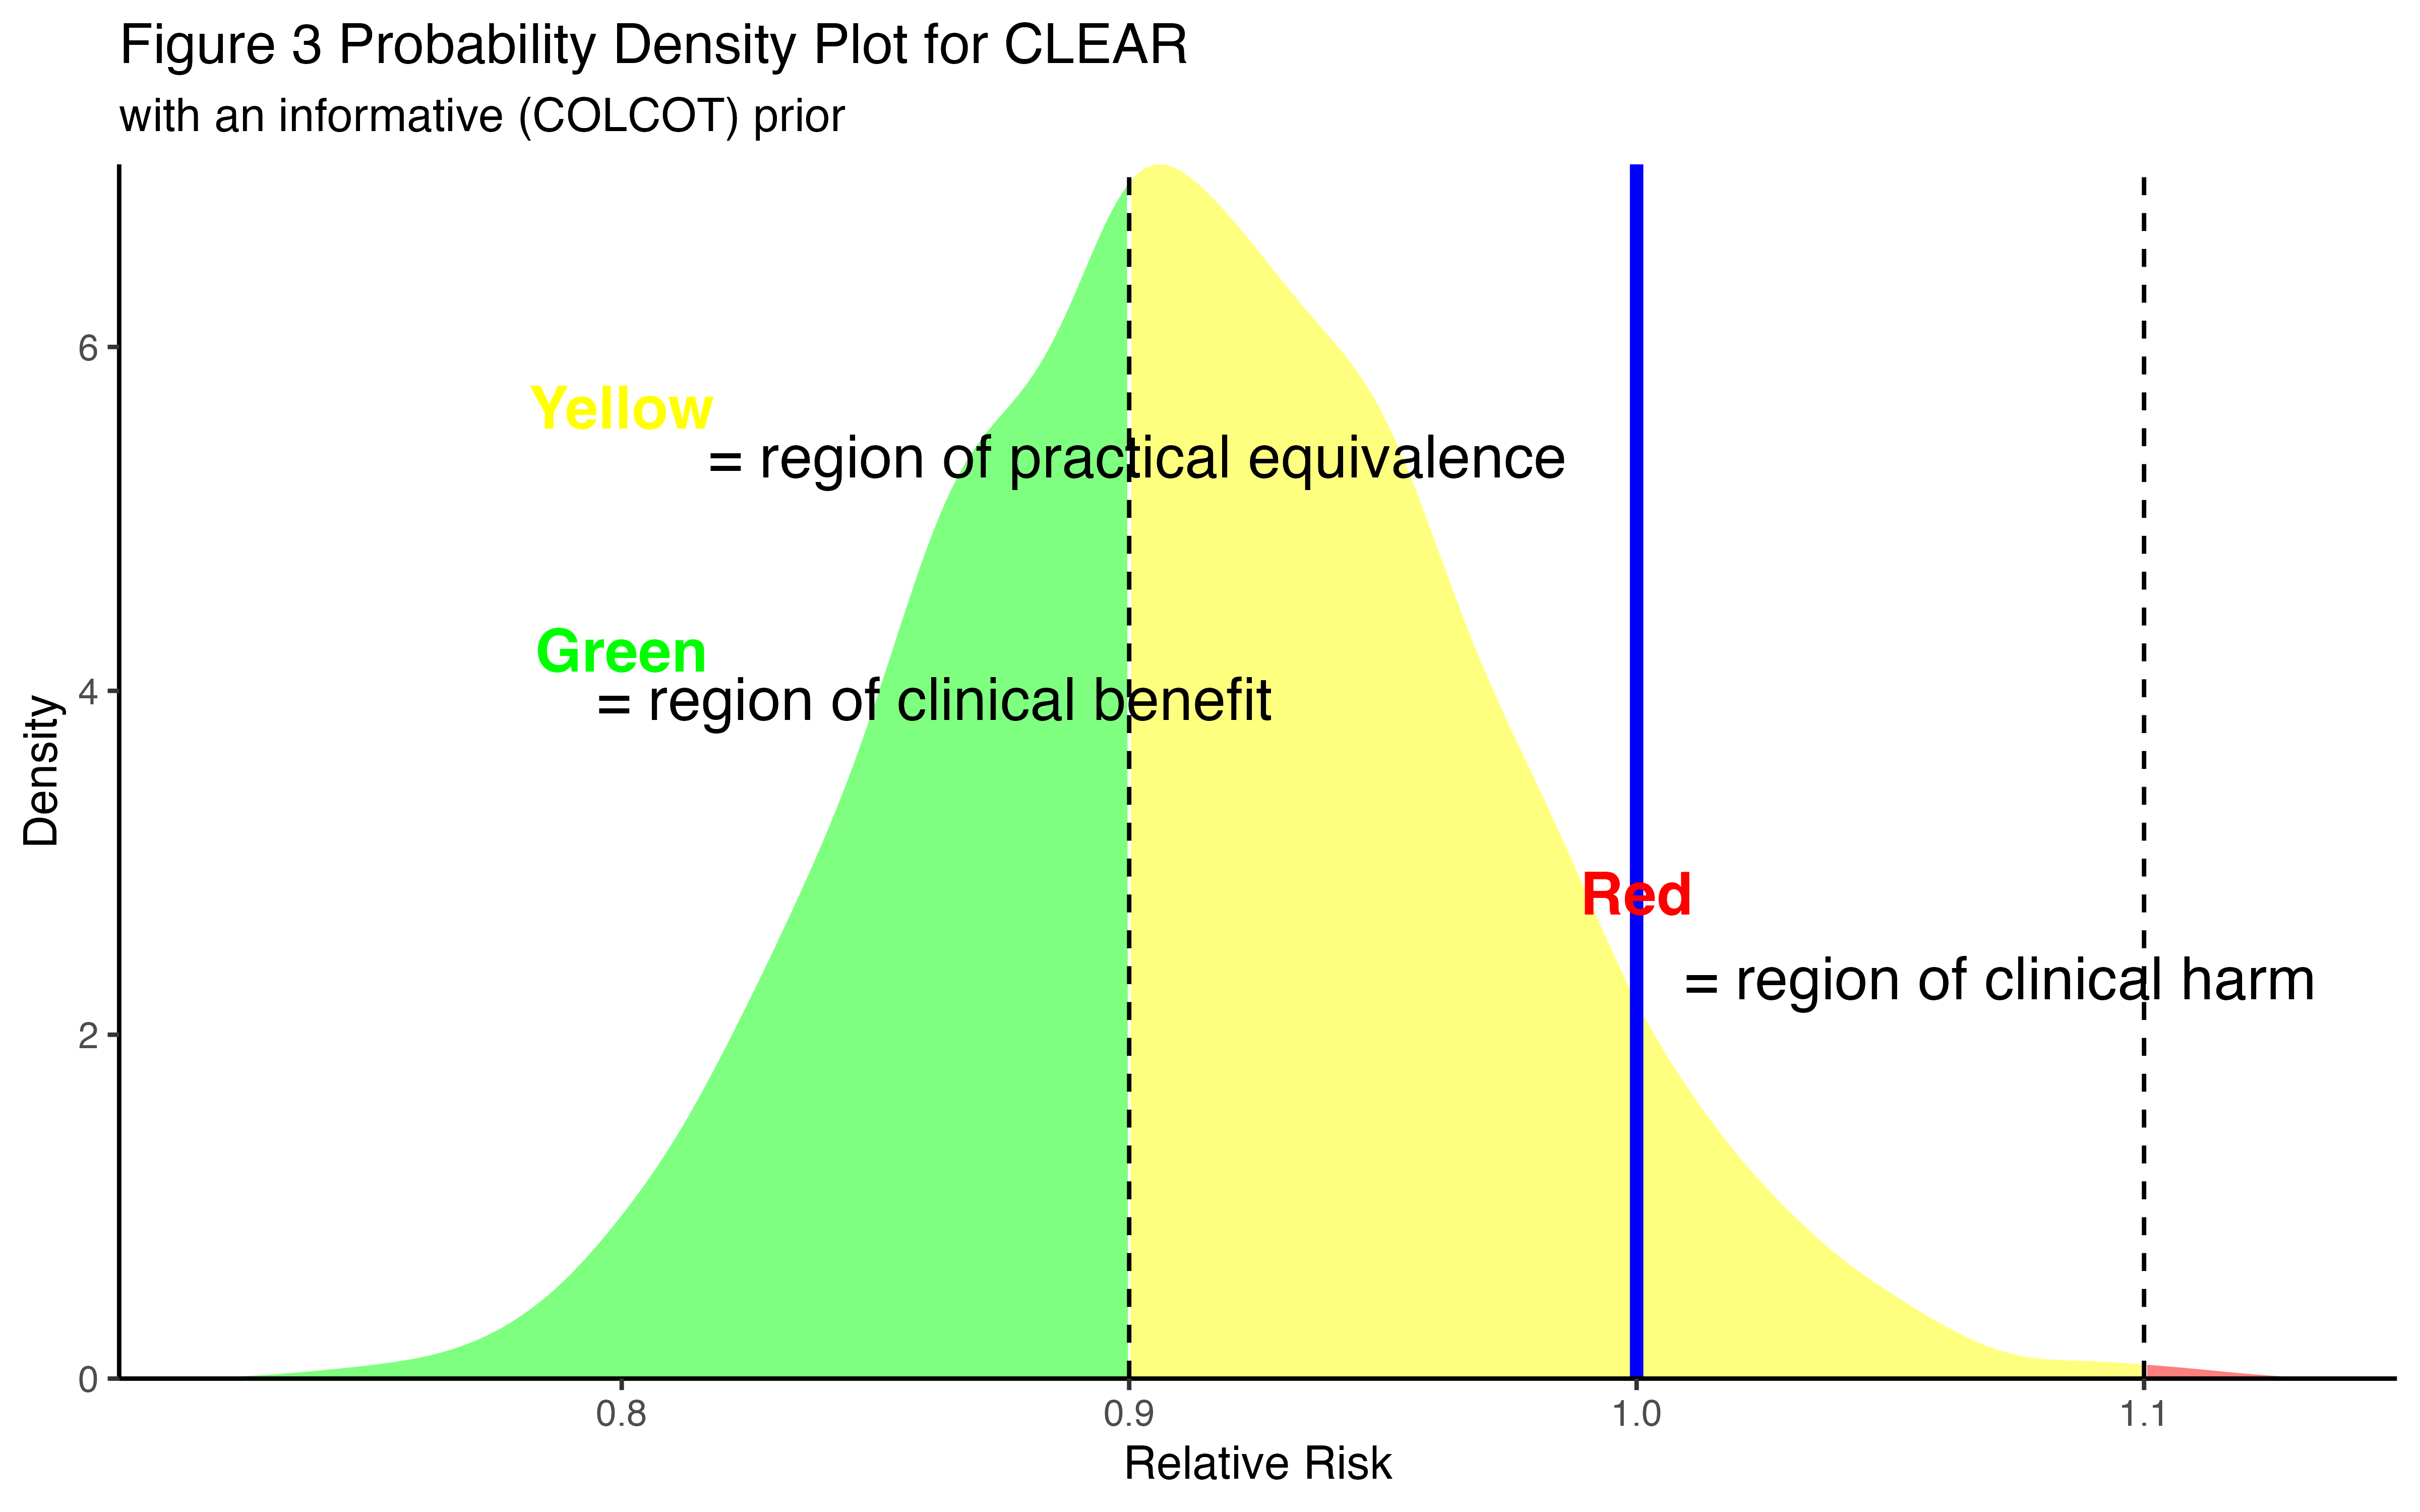   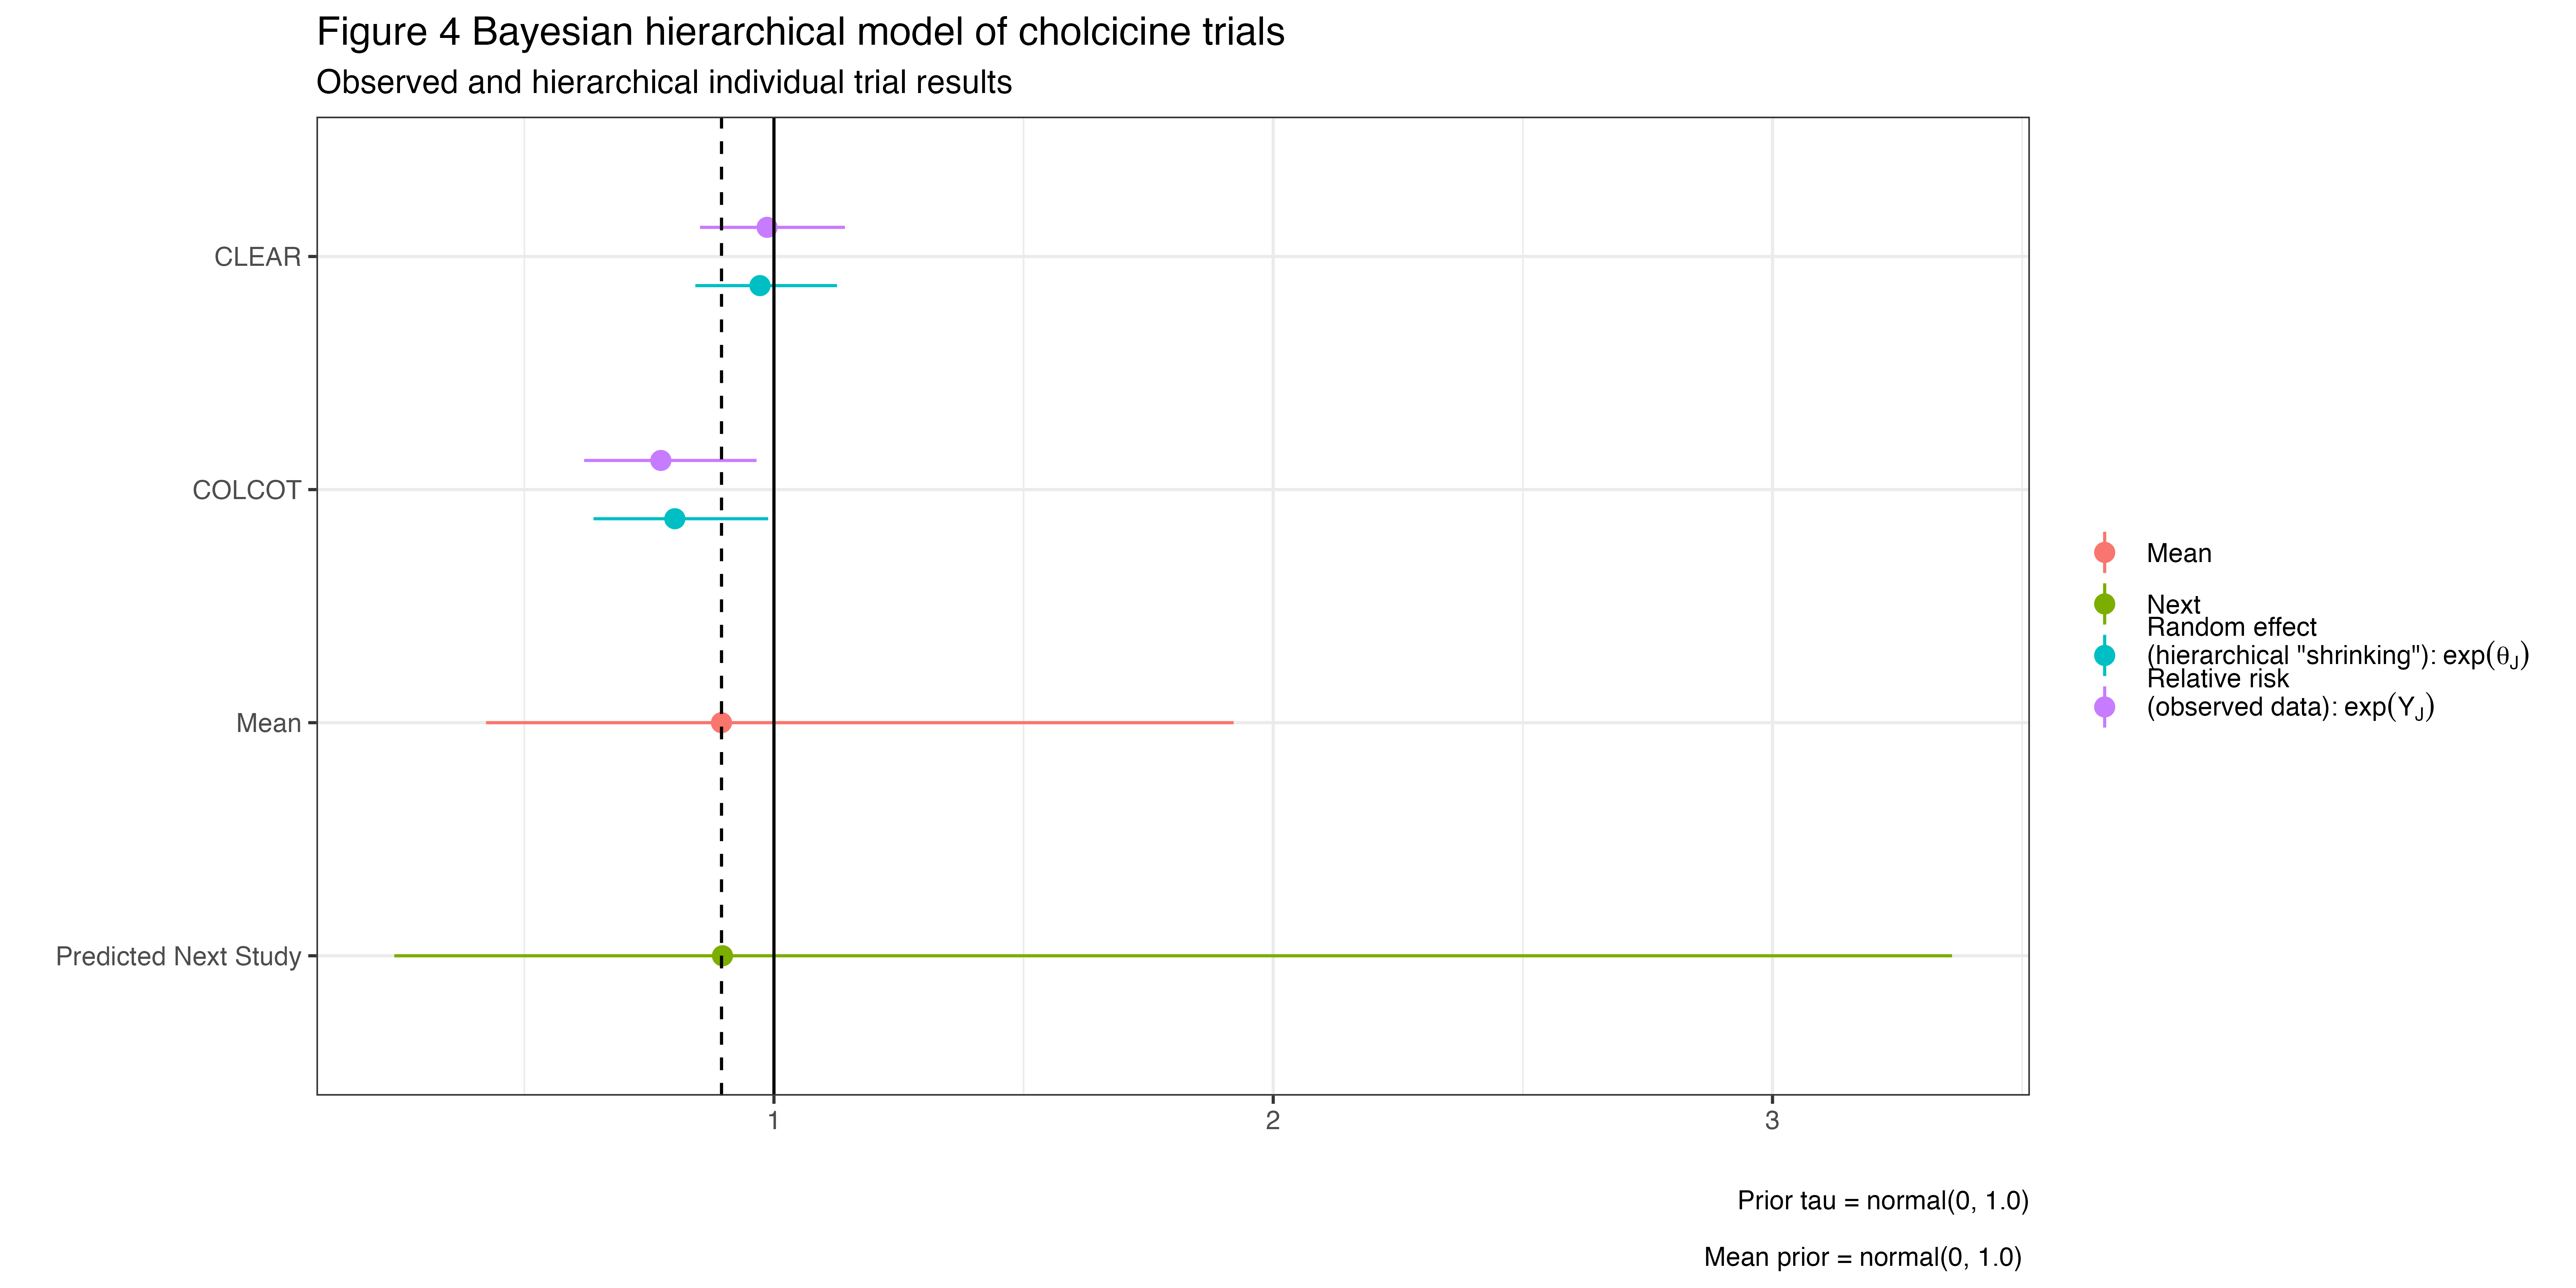  



## References

<span class="csl-left-margin">1. </span><span class="csl-right-inline">Jolly SS, d’Entremont MA, Lee SF, Mian R, Tyrwhitt J, Kedev S, et al. Colchicine in acute myocardial infarction. New England Journal of Medicine \[Internet\]. 0(0). Available from: <https://www.nejm.org/doi/full/10.1056/NEJMoa2405922></span>

<span class="csl-left-margin">2. </span><span class="csl-right-inline">Tardif JC, Kouz S, Waters DD, Bertrand OF, Diaz R, Maggioni AP, et al. Efficacy and safety of low-dose colchicine after myocardial infarction. N Engl J Med. 2019;381(26):2497–505. </span>

<span class="csl-left-margin">3. </span><span class="csl-right-inline">Kelly P, Lemmens R, Weimar C, Walsh C, Purroy F, Barber M, et al. Long-term colchicine for the prevention of vascular recurrent events in non-cardioembolic stroke (CONVINCE): A randomised controlled trial. Lancet. 2024;404:125–33. </span>

<span class="csl-left-margin">4. </span><span class="csl-right-inline">Li J, Meng X, Shi FD, Jing J, Gu HQ, Jin A, et al. Colchicine in patients with acute ischaemic stroke or transient ischaemic attack (CHANCE-3): Multicentre, double blind, randomised, placebo controlled trial. BMJ. 2024;385:e079061. </span>

<span class="csl-left-margin">5. </span><span class="csl-right-inline">Lou N. Colchicine goes belly-up in a more definitive heart attack trial \[Internet\]. 2024. Available from: <https://www.medpagetoday.com/meetingcoverage/tct/112644?xid=nl_mpt_Cardiology_update_2024-11-01&mh=5ea0ef63b494fbd59d59b80f4d7177fa&zdee=gAAAAABm4utWmSHJnY-b0PoghpwIdJ2Z5bp7pHCJbHd4lnSWdd-TcQH64qhAqr5vStSuTwshVLoWZmIfruyxrtdHQaON6GGWin0MsBBlzSgmQd4CbqGcFWQ%3D&utm_source=Sailthru&utm_medium=email&utm_campaign=Automated%20Specialty%20Update%20Cardiology%20BiWeekly%20FRIDAY%202024-11-01&utm_term=NL_Spec_Cardiology_Update_Active></span>

<span class="csl-left-margin">6. </span><span class="csl-right-inline">Wasserstein RL, Lazar NA. The ASA’s statement on p-values: Context, process, and purpose. The American Statistician. 2016;70:2:129–33. </span>

<span class="csl-left-margin">7. </span><span class="csl-right-inline">Greenland S, Senn SJ, Rothman KJ, Carlin JB, Poole C, Goodman SN, et al. Statistical tests, p values, confidence intervals, and power: A guide to misinterpretations. European journal of epidemiology. 2016;31(4):337–50. </span>

<span class="csl-left-margin">8. </span><span class="csl-right-inline">Wasserstein RL, Schirm AL, Lazar NA. Moving to a world beyond “p \< 0.05.” The American Statistician. 2019;73:1–19. </span>

<span class="csl-left-margin">9. </span><span class="csl-right-inline">Gelman A, Stern HS. The difference between “significant” and “not significant” is not itself statistically significant. 2006; </span>

<span class="csl-left-margin">10. </span><span class="csl-right-inline">Zwet E van, Wi!cek W, Gelman A. 2024. Available from: <chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://stat.columbia.edu/~gelman/research/unpublished/Meta_analysis_with_a_single_trial.pdf></span>